In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statistics as st

In [6]:
df_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [7]:
df1_2021= df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy()

In [8]:
df1_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


## Basic Score Explanations of the Variables:
##### Ladder score : Happiness score. 0 lowest, 10 maximum
##### Social Support: Perceived social support score 0 lowest, 10 maximum
##### Freedom to make life choices: Perceived freedom of expression 0 lowest, 10 maximum
##### Perceptions of corruption: Perceived corruption and kind of distrust in institutions 0 lowest, 10 maximum distrust

In [25]:
df1_2021.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [12]:
df1_2021['Ladder score'].describe()

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

In [21]:
stats.skew(df1_2021['Ladder score'])

-0.10321590748801858

# Ladder Score

### histogram

<Figure size 2800x2400 with 0 Axes>

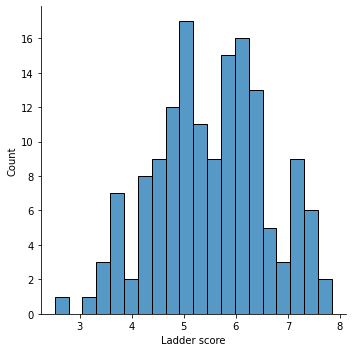

In [22]:
plt.figure(figsize=(14,12), dpi=200)
sns.displot(x="Ladder score", data=df1_2021, bins=20);

<Figure size 2800x2400 with 0 Axes>

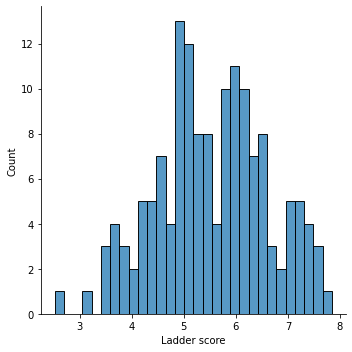

In [26]:
plt.figure(figsize=(14,12), dpi=200)
sns.displot(x="Ladder score", data=df1_2021, bins=30);

# bin değerini 30 yaptım. şimdi soldaki ayrık değeri daha net görebiliyorum.

<Figure size 2800x2400 with 0 Axes>

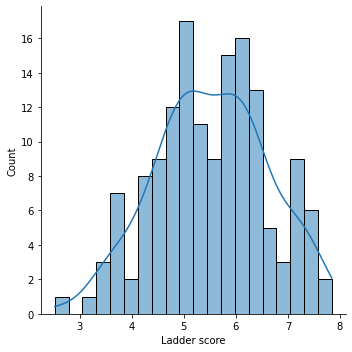

In [27]:
plt.figure(figsize=(14,12), dpi =200)
sns.displot(x='Ladder score', data= df1_2021, bins=20, kde= True)

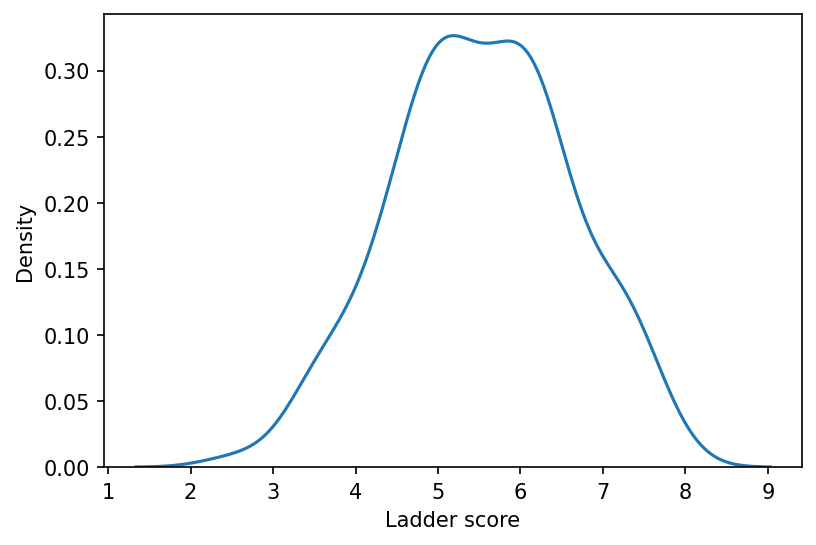

In [28]:
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(x="Ladder score", data=df_2021);

### Boxplot

<AxesSubplot:xlabel='Ladder score'>

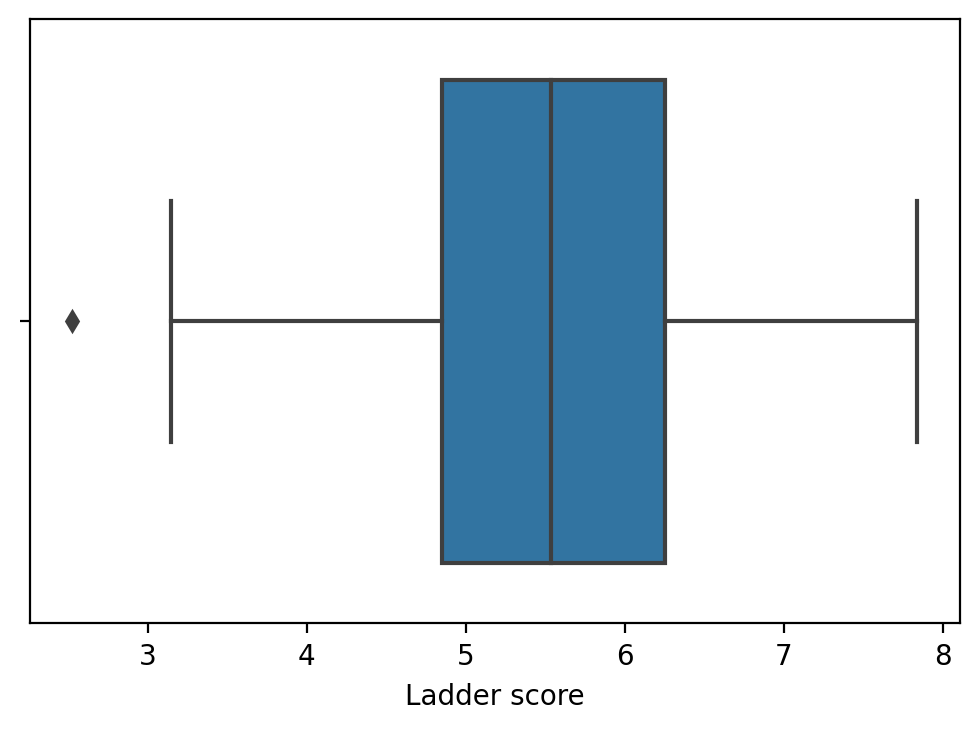

In [30]:
plt.figure(figsize=(6,4), dpi=200)
sns.boxplot(x='Ladder score', data=df1_2021, orient='h')

# boxplot'una baktığımda solda bir OUTLIER olduğunu gördüm.

In [31]:
Q1, Q3 = np.percentile(df1_2021['Ladder score'], [25, 75])
Q1, Q3

# Q1 ve Q3 değerlerini percentile fonksiyonu ile hesapladık

(4.852, 6.255)

In [35]:
IQR = Q3 - Q1
IQR

1.4029999999999996

In [33]:
stats.iqr(df1_2021['Ladder score'])

# IQR değerimi scipy kütüphanesindeki bu fonksiyonu kullanarak da hesaplayabilirim.

1.4029999999999996

In [36]:
minimum = Q1 - 1.5 * IQR
minimum

# bu boxplotumun minimumu. 
# bu data için minimum değerim de boxplot'umum minimumu ile aynı

2.747500000000001

In [37]:
maximum = Q3 + 1.5 * IQR
maximum

8.359499999999999

In [63]:
potential_outliers = df1_2021[(df1_2021["Ladder score"] < minimum) | (df1_2021["Ladder score"] > maximum)]
potential_outliers

# potansiyel tüm outlier'ları veren condition'ımı yazdım. ve başına df1_2021[ yazarak bu şartları sağlayan ülkeleri çekmiş oldum.

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


# Hands on

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statistics as st

In [40]:
df6 = pd.read_csv("world-happiness-report-2021.csv")

In [42]:
df6.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [43]:
df6.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [46]:
df6_new = df6[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [47]:
df6_new

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [48]:
df6_new.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [49]:
df6_new.describe().T

# değerlere görsel olarak farklı bir açıdan bakabilmek için transpose aldım.

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


<AxesSubplot:xlabel='Social support'>

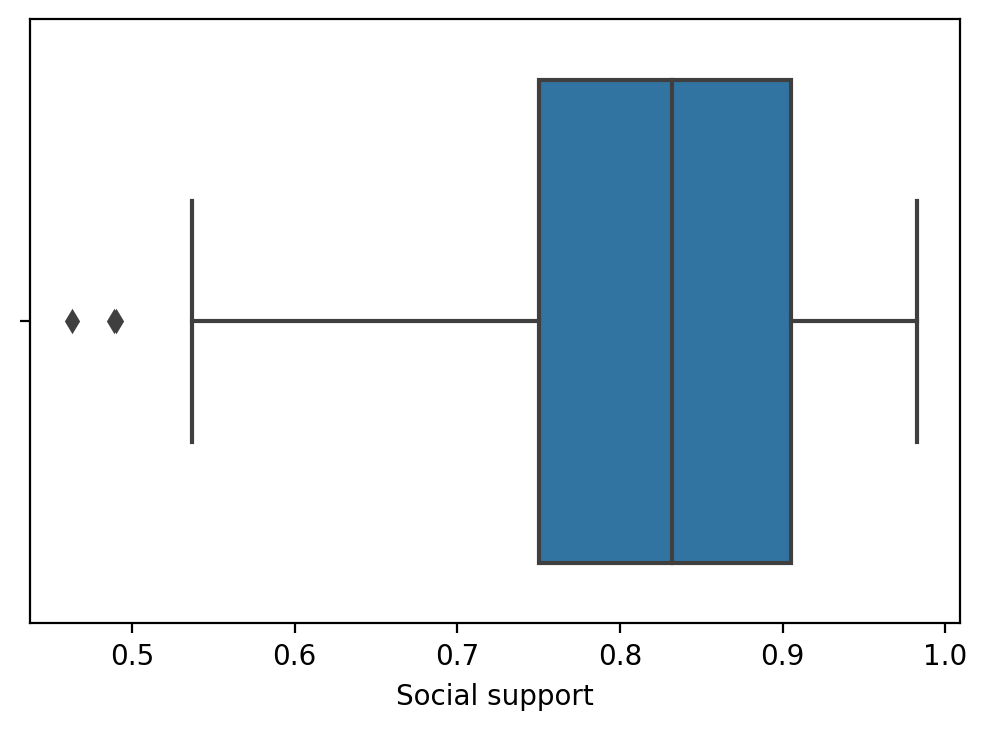

In [52]:
plt.figure(figsize=(6,4), dpi=200)
sns.boxplot(x='Social support', data=df1_2021, orient='h')

In [54]:
Q1, Q3 = np.percentile(df1_2021['Social support'], [25, 75])
Q1, Q3


(0.75, 0.905)

In [55]:
IQR = Q3 - Q1
IQR

0.15500000000000003

In [56]:
stats.iqr(df1_2021['Ladder score'])

# IQR değerimi scipy kütüphanesindeki bu fonksiyonu kullanarak da hesaplayabilirim.

1.4029999999999996

In [57]:
minimum = Q1 - 1.5 * IQR
minimum

# verilerim içindeki minimum değerimin (0.463000) şeklimin minimum değerinden küçük olduğunu gördüm.
# demek ki sol tarafta outlierlarımın olduğunu söyleyebilirim. 

0.5175

In [58]:
maximum = Q3 + 1.5 * IQR
maximum

# verilerim içerisindeki maksimum değerimin (0.983) şeklimin max değerinden küçük olduğunu gördüm.
# demek ki sağ tarafta outlier yok diyebilirim.

1.1375000000000002

In [64]:
potential_outliers = df1_2021[(df1_2021["Social support"] < minimum) | (df1_2021["Social support"] > maximum)]
potential_outliers

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
98,Benin,Sub-Saharan Africa,5.045,8.087,0.489,54.713,0.757,-0.034,0.661
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
